- 코랩 한글 폰트 사용 설정
- 아래 셀 실행 후, 런타임 -> 런타임 다시 시작

In [ ]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


수강생분의 이름과 학번을 입력해주세요.

In [ ]:
print("안희진", "20201944")

안희진 20201944


구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


작업폴더 경로 설정

In [ ]:
workspace_path = '/gdrive/My Drive/인공지능/Al_week3'  # 과제 파일 업로드한 경로 반영
# 작업폴더 경로 참고: 작업폴더 하위에 data 폴더 생성하여 CSV 파일 읽기/쓰기 수행
# A = os.path.join(workspace_path, 'data/winequality-red.csv')  # workspace_path 이용한 경로 설정 예시
# A = '/gdrive/My Drive/Colab Notebooks/data/winequality-red.csv'  # 절대 경로 설정 예시

# 텍스트빈도분석 - 1. 영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [ ]:
!pip install wordcloud  # 워드클라우드 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NLTK 패키지 링크: https://github.com/nltk/nltk

In [ ]:
import nltk
nltk.download('all')  # Natural Language ToolKit 모든 패키지 설치

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
import os
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

from wordcloud import WordCloud, STOPWORDS

import matplotlib
import matplotlib.pyplot as plt

# 1. 데이터 준비

### 1-1. 파일 병합

In [ ]:
all_files = glob.glob(os.path.join(workspace_path, 'data/myCabinetExcelData*.xls'))

all_files  # 출력하여 내용 확인

['/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (8).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (1).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (6).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (3).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (9).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (4).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (2).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (5).xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData.xls',
 '/gdrive/My Drive/인공지능/Al_week3/data/myCabinetExcelData (7).xls']

In [ ]:
all_files_data = []  # 저장할 리스트

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0]  # 출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Using big data for big impact: Leveraging anal...,unknown,NELSON PUBLISHING,2011
1,NaN,2,Five Guiding Principles for Realizing the Prom...,"Mantha, B.",The Data Warehouse Institute,2014
2,NaN,3,Imagining big data: Illustrations of “big data...,Christian Pentzold; Cornelia Brantner; Lena Fö...,SAGE PUBLICATIONS LTD,2019
3,NaN,4,"The Big Picture: On Mice, Badges for Your CV, ...","Lazar, N.",Taylor and Francis,2014
4,NaN,5,A Data-Driven Axes Creation Model for Correlat...,"Nakanishi, Takafumi",IOS Press,2014
...,...,...,...,...,...,...
95,NaN,96,From the Editors—Big Data and Data Science Met...,"George, Gerard; Osinga, Ernst C.; Lavie, Do...",ACADEMY OF MANAGEMENT,2016
96,NaN,97,A versatile data-intensive computing platform ...,"Soille, P.; Burger, A.; De Marchi, D.; Kempene...","Elsevier Science B.V., Amsterdam.",2018
97,NaN,98,Busting the big data myths. A backlash against...,"Hick, R.",CENTAUR MEDIA PLC,2014
98,NaN,99,"Dazzled by data: Big Data, the census and urba...","Shearmur, Richard",Taylor and Francis,2015


In [ ]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat  # 출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Using big data for big impact: Leveraging anal...,unknown,NELSON PUBLISHING,2011
1,NaN,2,Five Guiding Principles for Realizing the Prom...,"Mantha, B.",The Data Warehouse Institute,2014
2,NaN,3,Imagining big data: Illustrations of “big data...,Christian Pentzold; Cornelia Brantner; Lena Fö...,SAGE PUBLICATIONS LTD,2019
3,NaN,4,"The Big Picture: On Mice, Badges for Your CV, ...","Lazar, N.",Taylor and Francis,2014
4,NaN,5,A Data-Driven Axes Creation Model for Correlat...,"Nakanishi, Takafumi",IOS Press,2014
...,...,...,...,...,...,...
995,NaN,96,Efficient data management tools for the hetero...,"Alekseev, A. A.; Osipova, V. V.; Ivanov, M. A....",Springer Science + Business Media,2016
996,NaN,97,Securing Big Data Provenance for Auditors: The...,"Appelbaum, Deniz",Strategic and Emerging Technologies Section of...,2016
997,NaN,98,Demystifying big data: Anatomy of big data dev...,"Shin, Dong-Hee","Elsevier Science B.V., Amsterdam.",2016
998,NaN,99,Assessing Whether “Big Data” Solutions Provide...,"Hertz, D.; Gavaghan, M.; Garfield, S.","Elsevier Science B.V., Amsterdam",2014


In [ ]:
all_files_data_concat.to_csv(os.path.join(workspace_path, 'data/riss_bigdata.csv'), encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [ ]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title  # 출력하여 내용 확인

0      Using big data for big impact: Leveraging anal...
1      Five Guiding Principles for Realizing the Prom...
2      Imagining big data: Illustrations of “big data...
3      The Big Picture: On Mice, Badges for Your CV, ...
4      A Data-Driven Axes Creation Model for Correlat...
                             ...                        
995    Efficient data management tools for the hetero...
996    Securing Big Data Provenance for Auditors: The...
997    Demystifying big data: Anatomy of big data dev...
998    Assessing Whether “Big Data” Solutions Provide...
999    Why Big Data Is a Big Deal A new class of data...
Name: 제목, Length: 1000, dtype: object

In [ ]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

Python 정규식 보충자료: https://wikidocs.net/4308

In [ ]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))  # 정규식 이용하여 예외단어 -> 공백처리
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [ ]:
print(words)  # 출력하여 내용 확인

[['using', 'big', 'data', 'big', 'impact', 'leveraging', 'analytics', 'provides', 'foundation', 'rethinking', 'impact', 'patient', 'behavior'], ['five', 'guiding', 'principle', 'realizing', 'promise', 'big', 'data'], ['imagining', 'big', 'data', 'illustration', 'big', 'data', 'u', 'news', 'article'], ['big', 'picture', 'mouse', 'badge', 'cv', 'big', 'data', 'backlash'], ['data', 'driven', 'ax', 'creation', 'model', 'correlation', 'measurement', 'big', 'data', 'analytics'], ['data', 'revolution', 'big', 'data', 'open', 'data', 'data', 'infrastructure', 'consequence'], ['good', 'data', 'come', 'small', 'package', 'connecting', 'big', 'data', 'best', 'way', 'marketer', 'extract', 'maximum', 'value', 'say', 'medium', 'iq', 'stewart', 'easterbrook', 'marketer', 'small', 'insightful', 'package', 'likely', 'face', 'big', 'data', 'paralysis'], ['confronting', 'big', 'data', 'applying', 'confrontation', 'clause', 'government', 'data', 'collection'], ['turning', 'big', 'data', 'tiny', 'data', 'c

In [ ]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  # 작업 내용 확인

['using', 'big', 'data', 'big', 'impact', 'leveraging', 'analytics', 'provides', 'foundation', 'rethinking', 'impact', 'patient', 'behavior', 'five', 'guiding', 'principle', 'realizing', 'promise', 'big', 'data', 'imagining', 'big', 'data', 'illustration', 'big', 'data', 'u', 'news', 'article', 'big', 'picture', 'mouse', 'badge', 'cv', 'big', 'data', 'backlash', 'data', 'driven', 'ax', 'creation', 'model', 'correlation', 'measurement', 'big', 'data', 'analytics', 'data', 'revolution', 'big', 'data', 'open', 'data', 'data', 'infrastructure', 'consequence', 'good', 'data', 'come', 'small', 'package', 'connecting', 'big', 'data', 'best', 'way', 'marketer', 'extract', 'maximum', 'value', 'say', 'medium', 'iq', 'stewart', 'easterbrook', 'marketer', 'small', 'insightful', 'package', 'likely', 'face', 'big', 'data', 'paralysis', 'confronting', 'big', 'data', 'applying', 'confrontation', 'clause', 'government', 'data', 'collection', 'turning', 'big', 'data', 'tiny', 'data', 'constant', 'size',

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(words2)

count  # 출력하여 내용 확인

Counter({'using': 57,
         'big': 1354,
         'data': 1645,
         'impact': 10,
         'leveraging': 7,
         'analytics': 137,
         'provides': 6,
         'foundation': 3,
         'rethinking': 5,
         'patient': 11,
         'behavior': 2,
         'five': 4,
         'guiding': 2,
         'principle': 1,
         'realizing': 2,
         'promise': 13,
         'imagining': 1,
         'illustration': 1,
         'u': 12,
         'news': 2,
         'article': 4,
         'picture': 13,
         'mouse': 2,
         'badge': 2,
         'cv': 2,
         'backlash': 3,
         'driven': 24,
         'ax': 1,
         'creation': 4,
         'model': 37,
         'correlation': 2,
         'measurement': 6,
         'revolution': 8,
         'open': 20,
         'infrastructure': 12,
         'consequence': 6,
         'good': 7,
         'come': 3,
         'small': 27,
         'package': 3,
         'connecting': 3,
         'best': 9,
         'way': 1

In [ ]:
word_count = dict() #닥셔너리 생성, 키(key)와 값(value)이 한 쌍이 하나의 대응 관계를 가지고 있는 자료형

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
model : 37
health : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
information : 26
framework : 26
application : 25
computing : 25
driven : 24
issue : 24
social : 24
quality : 23
deal : 23
network : 23
use : 22
knowledge : 22
review : 22
efficient : 22
era : 22
storage : 21
healthcare : 21
perspective : 21
service : 21
open : 20
making : 19
survey : 19
process : 19
platform : 19
business : 18
method : 18
large : 18


#### 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [ ]:
# 검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2-2 단어 빈도 히스토그램

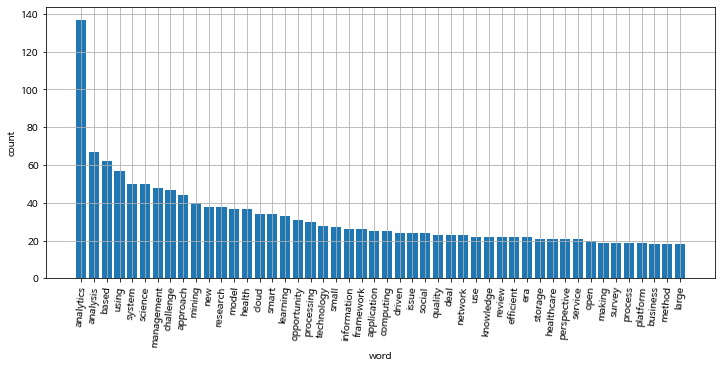

In [ ]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [ ]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  # 출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


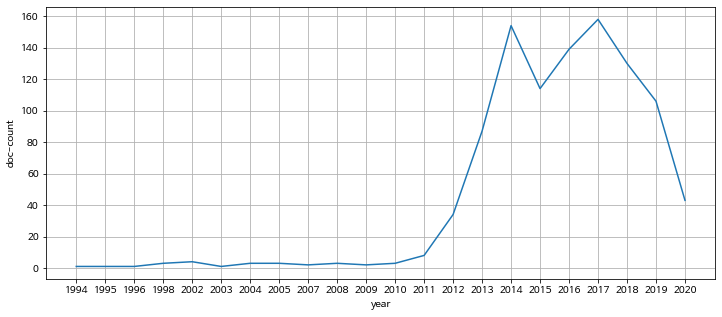

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

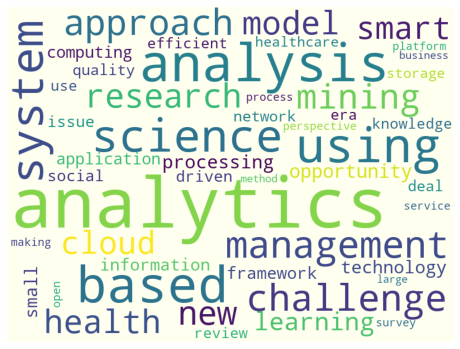

In [ ]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다. ☺

In [ ]:
cloud.to_file(os.path.join(workspace_path, "data/riss_bigdata_wordCloud.jpg"))

# 텍스트빈도분석 - 2. 한글 단어 분석

## 한글 단어 분석을 위한 패키지 준비

In [ ]:
!pip install konlpy  # KoNLPy 패키지 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
inputFileName = os.path.join(workspace_path, 'data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명')
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data  # 출력하여 내용 확인

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''

message  # 출력하여 내용 확인

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N  # 출력하여 내용 확인

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count  # 출력하여 내용 확인

Counter({'스파크': 3,
         '포럼': 5,
         '미래': 3,
         '시대': 7,
         '조직': 4,
         '변화': 3,
         '시작': 1,
         '현': 1,
         '사회': 3,
         '문제': 1,
         '및': 1,
         '이슈': 2,
         '제기': 1,
         '그': 1,
         '혁신': 1,
         '해결': 1,
         '소셜': 2,
         '이노': 1,
         '베이': 1,
         '터': 4,
         '발굴': 1,
         '지원': 1,
         '우리': 2,
         '확산': 1,
         '위해': 2,
         '도전': 1,
         '만남': 1,
         '자리': 1,
         '차': 23,
         '산업혁명': 22,
         '기업': 3,
         '직문': 1,
         '실험': 1,
         '사례': 2,
         '통해': 4,
         '방향': 1,
         '생각': 1,
         '로봇': 3,
         '주요': 2,
         '성장': 1,
         '동력': 1,
         '국내': 2,
         '재': 1,
         '평가': 1,
         '분석': 1,
         '금융': 1,
         '산업': 10,
         '전반': 1,
         '점검': 1,
         '공통': 1,
         '간판': 1,
         '공약': 1,
         '선도': 1,
         '도시': 1,
         '구현': 1,
         '

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


### 히스토그램

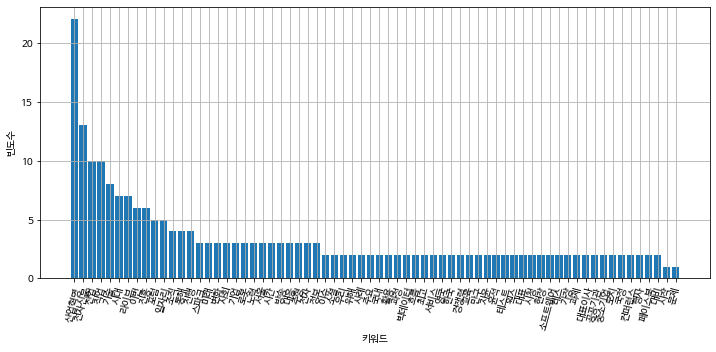

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

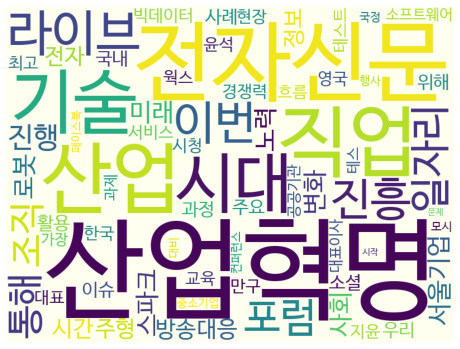

In [ ]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')

# 실습 과제

#### data/naver_news_example.json 파일의 description 추출하여 키워드 분석하기

- 키워드 분석 과정 코드, 출력결과 보이기
- 최종 결과물로 아래와 같은 히스토그램, 워드클라우드 생성하기 (워드클라우드 글자 위치, 색상은 매번 달라짐)
- 그 외의 조건은 앞의 한글 문서 분석과 동일함 (상위 80개 키워드 분석 등)

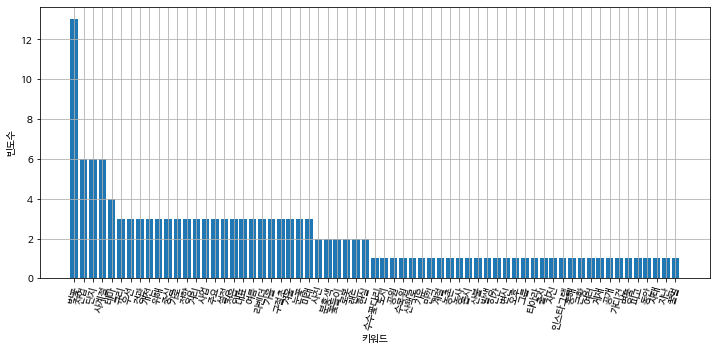

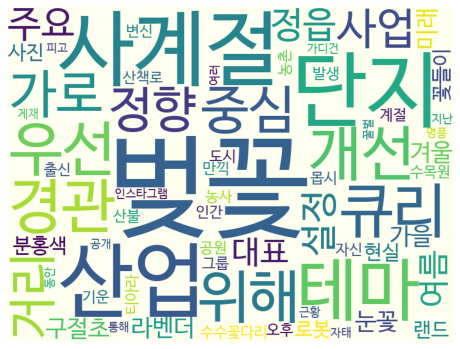

In [ ]:
inputFileName_pra = os.path.join(workspace_path, 'data/naver_news_example')
data2 = json.loads(open(inputFileName_pra+'.json', 'r', encoding='utf-8').read())
data2  # 출력하여 내용 확인

[{'title': '[전상우 독자기고] 울진 금강소나무림 산불로부터 보호하자',
  'originallink': 'http://www.kbsm.net/default/index_view_page.php?idx=308004&part_idx=300',
  'link': 'http://www.kbsm.net/default/index_view_page.php?idx=308004&part_idx=300',
  'description': '수수꽃다리, <b>벚꽃</b> 등 봄에 피는 꽃을 보며 도시공원, 수목원 등 산책로를 걸으면서 따스한 봄기운을 만끽할 수 있는 계절이다. 농촌에서는 한 해 농사에 몹시 바쁘게 움직이는 때이기도 하다. 그러나 이맘때에는 산불발생... ',
  'pubDate': 'Thu, 08 Apr 2021 20:31:00 +0900'},
 {'title': '티아라 큐리, 명품백 들고 청순청순 인간 <b>벚꽃</b> 변신',
  'originallink': 'http://biz.heraldcorp.com/view.php?ud=202104082017116644242_1',
  'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=112&aid=0003419722',
  'description': '큐리가 인간 <b>벚꽃</b>으로 변신했다. 8일 오후 그룹 티아라 출신 큐리는 자신의 인스타그램을 통해 &quot;feeling it&quot;라는 글과 함께 근황이 담긴 사진을 여러 장 게재했다. 공개된 사진 속 큐리는 분홍색 가디건에 분홍색 명품백을... ',
  'pubDate': 'Thu, 08 Apr 2021 20:25:00 +0900'},
 {'title': '마산 로봇랜드 봄봄 페스티벌 한창',
  'originallink': 'http://www.kndaily.co.kr/news/articleView.html?idxno=192451',
  'link': 'htt

In [ ]:
description = ''

for item in data2:
    if 'description' in item.keys():
        description = description + re.sub(r'[^\w]', ' ', item['description']) +''

description  # 출력하여 내용 확인

'수수꽃다리   b 벚꽃  b  등 봄에 피는 꽃을 보며 도시공원  수목원 등 산책로를 걸으면서 따스한 봄기운을 만끽할 수 있는 계절이다  농촌에서는 한 해 농사에 몹시 바쁘게 움직이는 때이기도 하다  그러나 이맘때에는 산불발생    큐리가 인간  b 벚꽃  b 으로 변신했다  8일 오후 그룹 티아라 출신 큐리는 자신의 인스타그램을 통해  quot feeling it quot 라는 글과 함께 근황이 담긴 사진을 여러 장 게재했다  공개된 사진 속 큐리는 분홍색 가디건에 분홍색 명품백을    알록달록한 봄꽃들이 피고 지는 동안 변함없이 화려한 자태의  b 벚꽃  b 을 볼 수 있는 곳이 있다  지난 3월부터   b 벚꽃  b 과 꿀벌 세상 이라는 주제로 봄의 시작을 알린 경남 마산로봇랜드 테마파크 이하 로봇랜드 의  봄봄 페스티벌    우선  경관개선을 위해 산업단지 중심 가로에  사계절 꽃피는 정향 井香  거리 를 사업의 주요 테마로 설정하고  정읍의 사계절을 대표하는 꽃 봄  b 벚꽃  b   여름 라벤더  가을 구절초  겨울 눈꽃 과 산업단지의 미래비전을    강둑을 따라 전주 팔복동에서 목천포까지 이어지는 연분홍  b 벚꽃  b 길이 마치 행군하는 병사들 같다  때마침 새로 난 전라선 철교를 따라 여수행 열차가 유유히 빠져나간다  남쪽으로 가는 나들이객들이 차량 가득 몸을 맡기고    우선  경관개선을 위해 산업단지 중심 가로에  사계절 꽃피는 정향 井香  거리 를 사업의 주요 테마로 설정하고  정읍의 사계절을 대표하는 꽃 봄  b 벚꽃  b   여름 라벤더  가을 구절초  겨울 눈꽃 과 산업단지의 미래비전을    바글바글 끓는 생태탕 냄새가 전국을 강타하는 와중에도 봄날의  b 벚꽃  b  잎은 휘날렸다  감성은 땅에 떨어져 뒹굴었고  서울과 부산의 시민은 몸을 굽혀 현실을 주웠다  멀어져간 내 집 마련의 꿈  그 현실은 깨진 유리    우선 경관개선을 위해 산업단지 중심 가로에  사계절 꽃피는 정향 井香  거리 를 사업의 주요 테마로 설정하고 정읍의 

In [ ]:
nlp = Okt()
message_N = nlp.nouns(description)
message_N  # 출력하여 내용 확인

['수수꽃다리',
 '벚꽃',
 '등',
 '봄',
 '꽃',
 '도시',
 '공원',
 '수목원',
 '등',
 '산책로',
 '봄',
 '기운',
 '만끽',
 '수',
 '계절',
 '농촌',
 '해',
 '농사',
 '몹시',
 '때',
 '산불',
 '발생',
 '큐리',
 '인간',
 '벚꽃',
 '변신',
 '오후',
 '그룹',
 '티아라',
 '출신',
 '큐리',
 '자신',
 '인스타그램',
 '통해',
 '글',
 '근황',
 '사진',
 '여러',
 '장',
 '게재',
 '공개',
 '사진',
 '속',
 '큐리',
 '분홍색',
 '가디건',
 '분홍색',
 '명품',
 '봄',
 '꽃들이',
 '피고',
 '동안',
 '자태',
 '벚꽃',
 '볼',
 '수',
 '곳',
 '지난',
 '벚꽃',
 '과',
 '꿀벌',
 '세상',
 '주제',
 '봄',
 '시작',
 '경남',
 '마산',
 '로봇',
 '랜드',
 '테마',
 '파크',
 '이하',
 '로봇',
 '랜드',
 '의',
 '봄봄',
 '페스티벌',
 '우선',
 '경관',
 '개선',
 '위해',
 '산업',
 '단지',
 '중심',
 '가로',
 '사계절',
 '꽃',
 '정향',
 '거리',
 '를',
 '사업',
 '주요',
 '테마',
 '설정',
 '정읍',
 '사계절',
 '대표',
 '꽃',
 '봄',
 '벚꽃',
 '여름',
 '라벤더',
 '가을',
 '구절초',
 '겨울',
 '눈꽃',
 '과',
 '산업',
 '단지',
 '미래',
 '강둑',
 '전주',
 '팔복동',
 '목',
 '포',
 '연분홍',
 '벚꽃',
 '길이',
 '마치',
 '행군',
 '병사',
 '때마침',
 '난',
 '전라선',
 '철교',
 '수행',
 '열차',
 '유유',
 '남쪽',
 '나들이',
 '객',
 '차량',
 '가득',
 '몸',
 '우선',
 '경관',
 '개선',
 '위해',
 '산업',
 '단지',
 '중심',
 '가로',
 '사계절',
 '

In [ ]:
count = Counter(message_N)

count  # 출력하여 내용 확인

Counter({'수수꽃다리': 1,
         '벚꽃': 13,
         '등': 2,
         '봄': 7,
         '꽃': 7,
         '도시': 1,
         '공원': 1,
         '수목원': 1,
         '산책로': 1,
         '기운': 1,
         '만끽': 1,
         '수': 2,
         '계절': 1,
         '농촌': 1,
         '해': 1,
         '농사': 1,
         '몹시': 1,
         '때': 1,
         '산불': 1,
         '발생': 1,
         '큐리': 3,
         '인간': 1,
         '변신': 1,
         '오후': 1,
         '그룹': 1,
         '티아라': 1,
         '출신': 1,
         '자신': 1,
         '인스타그램': 1,
         '통해': 1,
         '글': 1,
         '근황': 1,
         '사진': 2,
         '여러': 1,
         '장': 1,
         '게재': 1,
         '공개': 1,
         '속': 1,
         '분홍색': 2,
         '가디건': 1,
         '명품': 1,
         '꽃들이': 2,
         '피고': 1,
         '동안': 1,
         '자태': 1,
         '볼': 1,
         '곳': 1,
         '지난': 1,
         '과': 4,
         '꿀벌': 1,
         '세상': 1,
         '주제': 1,
         '시작': 1,
         '경남': 1,
         '마산': 1,
         

In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

벚꽃 : 13
산업 : 6
단지 : 6
사계절 : 6
테마 : 4
큐리 : 3
우선 : 3
경관 : 3
개선 : 3
위해 : 3
중심 : 3
가로 : 3
정향 : 3
거리 : 3
사업 : 3
주요 : 3
설정 : 3
정읍 : 3
대표 : 3
여름 : 3
라벤더 : 3
가을 : 3
구절초 : 3
겨울 : 3
눈꽃 : 3
미래 : 3
사진 : 2
분홍색 : 2
꽃들이 : 2
로봇 : 2
랜드 : 2
현실 : 2
수수꽃다리 : 1
도시 : 1
공원 : 1
수목원 : 1
산책로 : 1
기운 : 1
만끽 : 1
계절 : 1
농촌 : 1
농사 : 1
몹시 : 1
산불 : 1
발생 : 1
인간 : 1
변신 : 1
오후 : 1
그룹 : 1
티아라 : 1
출신 : 1
자신 : 1
인스타그램 : 1
통해 : 1
근황 : 1
여러 : 1
게재 : 1
공개 : 1
가디건 : 1
명품 : 1
피고 : 1
동안 : 1
자태 : 1
지난 : 1
꿀벌 : 1


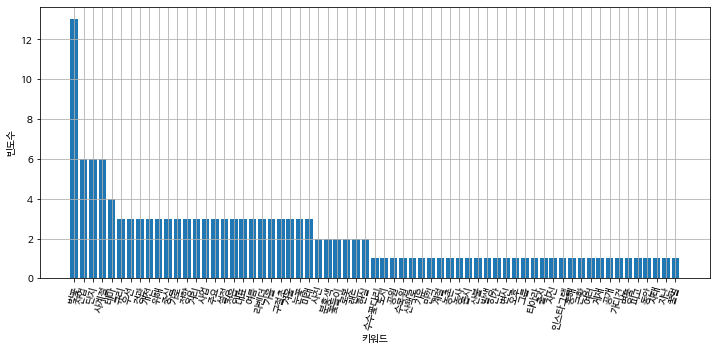

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

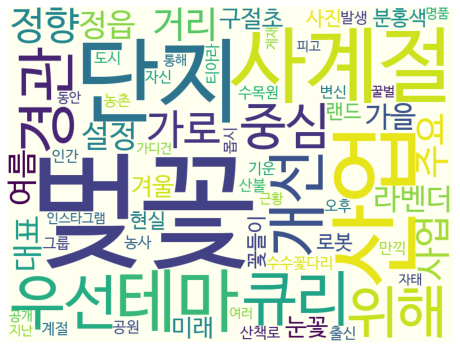

In [ ]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')